In [96]:
import sys
import os
import importlib
import nltk

nltk.download('punkt') # Example download

current_dir = os.path.dirname(os.path.abspath(''))
shared_path = os.path.join(current_dir, '..', 'shared')
if os.path.exists(shared_path):
    sys.path.append(shared_path)
else:
    # Fallback: try relative path
    sys.path.append('../shared')

# Force reload the module to get the latest changes
if 'NLPMethods' in sys.modules:
    importlib.reload(sys.modules['NLPMethods'])

from NLPMethods import NLPMethods

nlp_methods = NLPMethods()
clean_corpus = nlp_methods.remove_gutenberg_header("https://www.gutenberg.org/cache/epub/2500/pg2500.txt")
corpus_data = nlp_methods.get_processed_text(clean_corpus)

# print(corpus_data['quote_sentences'])
chapters = nlp_methods.get_chapters(clean_corpus)
chapters_data = nlp_methods.get_chapter_data(chapters, clean_corpus)
chapters_df = nlp_methods.chapters_to_dataframe(chapters_data)
random_sample = nlp_methods.get_random_sample_chapter_data(chapters, clean_corpus)
systematic_sample = nlp_methods.get_systematic_sample_chapter_data(chapters, clean_corpus)
print(nlp_methods.compare_sample_lengths(random_sample, systematic_sample))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marobinette/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of sentences: 1857
Number of quotes found: 372
Quote sentences: 95
Non-quote sentences: 1762
Quote tokens: 0
Non-quote tokens: 39799
Longest dialogue:
{'exchange': [{'content': 'Simple is the life which people lead in this world '
                          'here,',
               'end': 81086,
               'start': 81028},
              {'content': 'It presents no difficulties. Everything was '
                          'difficult, toilsome, and ultimately hopeless, when '
                          'I was still a Samana. Now, everything is easy, easy '
                          'like that lesson in kissing, which Kamala is giving '
                          'me. I need clothes and money, nothing else; these '
                          'are small, near goals, they won’t make a person '
                          'lose any sleep.',
               'end': 81421,
               'start': 81107},
              {'content': 'Things are working out well,',
               'end': 81556,
  

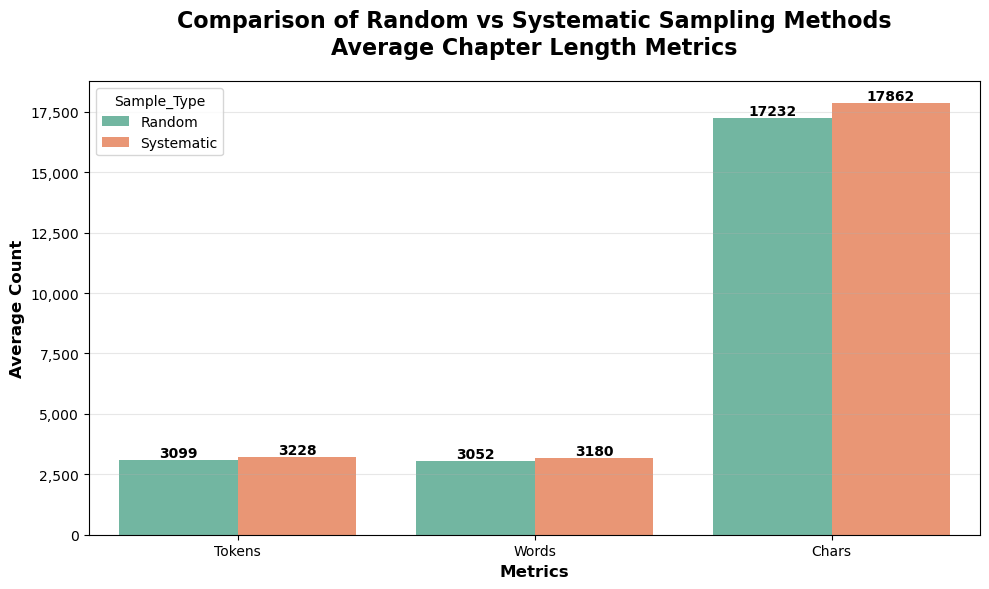


SUMMARY STATISTICS
Random Sample Count: 7 chapters
Systematic Sample Count: 8 chapters

Differences (Random - Systematic):
Tokens: -128.3
Words: -127.1
Characters: -630.4


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the comparison data
comparison_data = nlp_methods.compare_sample_lengths(random_sample, systematic_sample)

# Prepare data for plotting
plot_data = []

# Extract data for each metric
metrics = ['tokens', 'words', 'chars']
for metric in metrics:
    avg_key = f'avg_{metric}'
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Random',
        'Average': comparison_data['random_sample'][avg_key]
    })
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Systematic', 
        'Average': comparison_data['systematic_sample'][avg_key]
    })

df_plot = pd.DataFrame(plot_data)

plt.style.use('default')
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_plot, x='Metric', y='Average', hue='Sample_Type', ax=ax)

# Customize the plot
ax.set_title('Comparison of Random vs Systematic Sampling Methods\nAverage Chapter Length Metrics', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Count', fontsize=12, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, fontweight='bold')

ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Random Sample Count: {comparison_data['random_sample']['count']} chapters")
print(f"Systematic Sample Count: {comparison_data['systematic_sample']['count']} chapters")
print("\nDifferences (Random - Systematic):")
print(f"Tokens: {comparison_data['differences']['token_diff']:,.1f}")
print(f"Words: {comparison_data['differences']['word_diff']:,.1f}")
print(f"Characters: {comparison_data['differences']['char_diff']:,.1f}")



/var/folders/02/c1hvrmj11kx0z457p84l6pbc0000gn/T/ipykernel_89307/1151186448.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h',


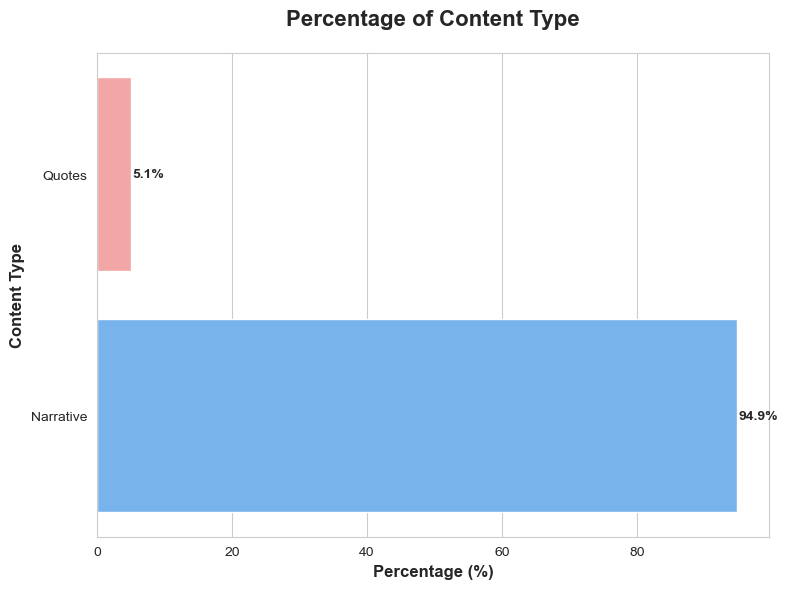


📊 QUOTES VS NARRATIVE ANALYSIS
Total sentences: 1,857
Quote sentences: 95 (5.1%)
Narrative sentences: 1,762 (94.9%)

Total tokens: 39,799
Quote tokens: 0
Narrative tokens: 39,799

Ratio of narrative to quotes: 18.5:1


In [105]:
# Plot quotes vs narrative comparison using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract quote vs narrative data from corpus_data
quote_sentences = len(corpus_data['quote_sentences'])
non_quote_sentences = len(corpus_data['non_quote_sentences'])
quote_tokens = len(corpus_data['quote_tokens'])
non_quote_tokens = len(corpus_data['non_quote_tokens'])

# Calculate percentages
quote_percentage = (quote_sentences / (quote_sentences + non_quote_sentences)) * 100
narrative_percentage = (non_quote_sentences / (quote_sentences + non_quote_sentences)) * 100

# Prepare data for seaborn
plot_data = pd.DataFrame({
    'Content_Type': ['Quotes', 'Narrative'],
    'Percentage': [quote_percentage, narrative_percentage]
})

# Create seaborn plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create horizontal bar plot with custom colors
ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h', 
                 palette=['#ff9999', '#66b3ff'])

# Customize the plot
ax.set_title('Percentage of Content Type', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Content Type', fontsize=12, fontweight='bold')

# Add value labels on bars
for i, (bar, pct) in enumerate(zip(ax.patches, [quote_percentage, narrative_percentage])):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print additional insights
print(f"\n📊 QUOTES VS NARRATIVE ANALYSIS")
print(f"=" * 40)
print(f"Total sentences: {quote_sentences + non_quote_sentences:,}")
print(f"Quote sentences: {quote_sentences:,} ({quote_percentage:.1f}%)")
print(f"Narrative sentences: {non_quote_sentences:,} ({narrative_percentage:.1f}%)")
print(f"\nTotal tokens: {quote_tokens + non_quote_tokens:,}")
print(f"Quote tokens: {quote_tokens:,}")
print(f"Narrative tokens: {non_quote_tokens:,}")
print(f"\nRatio of narrative to quotes: {non_quote_sentences/quote_sentences:.1f}:1")
